## Vertical transport figure

In [1]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
sns.set_context('paper')
sns.set_style('white')

In [3]:
def plotCSPos(ax,CS1,CS2,CS3,CS4):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    
def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty


In [4]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc' 
PtracersOut = Dataset(Ptracers)

PtracersNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc' 
PtracersOutNoC = Dataset(PtracersNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

grid = xr.open_dataset(CGrid)

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

flux = xr.open_dataset(flux_file)
fluxNoC = xr.open_dataset(fluxNoC_file)

In [5]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [6]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [7]:
ii=0
for rec in records:
    print(ii,rec.name)
    ii=ii+1
    
select_rec=[14,0,10,2,5,7,17]
line_col = ['k','0.5','0.3','k', 'k','0.3','0.5']
line_sty = ['-','-','-',':','--','--','--']
labels = ['Base $\kappa_v$ bkg,\n$10^{-2}m^2s^{-1}$ $\kappa_v$ cny',
          'Base',
          'Base $\kappa_v$ bkg,\n$10^{-3}m^2s^{-1}$ $\kappa_v$ cny',
          'Higher $\kappa_v$ bkg',
          'Lower $N$',
          'Lower $f$',
          'Lowest $U$',
          ]

0 CNTDIFF_run38
1 CNTDIFF_run37
2 CNTDIFF_run36
3 CNTDIFF_run45
4 CNTDIFF_run73
5 CNTDIFF_run75
6 CNTDIFF_run67
7 CNTDIFF_run51
8 CNTDIFF_run69
9 CNTDIFF_run71
10 3DVISC_run01
11 3DVISC_run02
12 3DVISC_run03
13 3DVISC_run04
14 3DVISC_run06
15 LOW_BF_run01
16 LOWER_BF_run01
17 LOWEST_BF_run01
18 LOWEST_BF_run03
19 LOWEST_BF_run05
20 LOWEST_BF_run07
21 LOWEST_BF_run11
22 3DVISC_run05


In [8]:
fileBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38advTracer_CS_transports.nc')
filewatBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38water_CS_transports.nc')
filedifBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38difTracer_CS_transports.nc')
    
dfcanBase = xr.open_dataset(fileBase)
dfdifBase = xr.open_dataset(filedifBase)
dfwatBase = xr.open_dataset(filewatBase)
    
verticalBase = (dfdifBase.Vert_dif_trans_sb + dfcanBase.Vert_adv_trans_sb)  


water, Base $\kappa_v$ bkg,
$10^{-2}m^2s^{-1}$ $\kappa_v$ cny
1.13142339611
0.165488280426
adv, Base $\kappa_v$ bkg,
$10^{-2}m^2s^{-1}$ $\kappa_v$ cny
1.1743
0.162151
total tracer, Base $\kappa_v$ bkg,
$10^{-2}m^2s^{-1}$ $\kappa_v$ cny
1.31409
0.195613
water, Base
1.0
0.0
adv, Base
1.0
0.0
total tracer, Base
1.0
0.0
water, Base $\kappa_v$ bkg,
$10^{-3}m^2s^{-1}$ $\kappa_v$ cny
1.15021665616
0.116800282593
adv, Base $\kappa_v$ bkg,
$10^{-3}m^2s^{-1}$ $\kappa_v$ cny
1.18052
0.132704
total tracer, Base $\kappa_v$ bkg,
$10^{-3}m^2s^{-1}$ $\kappa_v$ cny
1.22166
0.147973
water, Higher $\kappa_v$ bkg
1.11315013645
0.10483018757
adv, Higher $\kappa_v$ bkg
1.13965
0.120297
total tracer, Higher $\kappa_v$ bkg
1.18658
0.137692
water, Lower $N$
1.30569714633
0.186515021035
adv, Lower $N$
1.43043
0.187001
total tracer, Lower $N$
1.42936
0.187528
water, Lower $f$
0.750437623631
0.0952879304672
adv, Lower $f$
0.761553
0.0823513
total tracer, Lower $f$
0.761682
0.0823607
water, Lowest $U$
0.3367539778

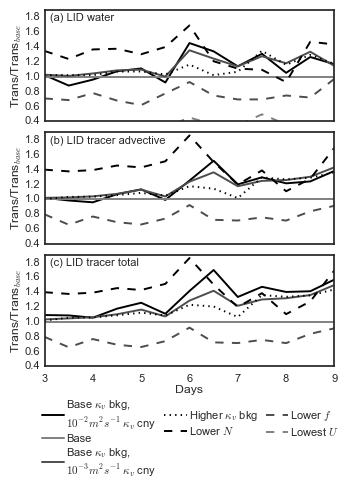

In [9]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (3.74,4.6)) # 95mm = 3.74 in, 115cm = 4.52in

gs = gspec.GridSpec(3, 1,hspace=0.1)

ax0 = plt.subplot(gs[0],xticks=[],yticks=[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])
ax1 = plt.subplot(gs[1],xticks=[],yticks=[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])
ax2 = plt.subplot(gs[2],yticks=[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])

ii=0

# Time series

for ind in select_rec:

    file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                records[ind].run_num))+
            'advTracer_CS_transports.nc')
    
    filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                   records[ind].run_num))+
            'difTracer_CS_transports.nc')
    
    filewat = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                   records[ind].run_num))+
            'water_CS_transports.nc')
    
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfwat = xr.open_dataset(filewat)
    
    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)  

    ax0.plot(np.arange(6,19,1)/2.0,(dfwat.Vert_water_trans_sb[6:].data/dfwatBase.Vert_water_trans_sb[6:].data),
             linestyle=line_sty[ii],
             color=line_col[ii])
    print('water, %s' %labels[ii])
    print(np.mean(dfwat.Vert_water_trans_sb[6:].data/dfwatBase.Vert_water_trans_sb[6:].data))
    print(np.std(dfwat.Vert_water_trans_sb[6:].data/dfwatBase.Vert_water_trans_sb[6:].data))
    
    ax1.plot(np.arange(6,19,1)/2.0,(dfcan.Vert_adv_trans_sb[5:].data/dfcanBase.Vert_adv_trans_sb[5:].data),
             linestyle=line_sty[ii],
             color=line_col[ii])
    print('adv, %s' %labels[ii])
    print(np.mean(dfcan.Vert_adv_trans_sb[5:].data/dfcanBase.Vert_adv_trans_sb[5:].data))
    print(np.std(dfcan.Vert_adv_trans_sb[5:].data/dfcanBase.Vert_adv_trans_sb[5:].data))
    
    ax2.plot(np.arange(6,19,1)/2.0,(vertical[5:].data/verticalBase[5:].data),
             linestyle=line_sty[ii],
             color=line_col[ii],
             label=labels[ii])
    print('total tracer, %s' %labels[ii])
    print(np.mean(vertical[5:].data/verticalBase[5:].data))
    print(np.std(vertical[5:].data/verticalBase[5:].data))
    
    ii=ii+1
    
    
ax2.set_xlabel('Days',labelpad=0.5)
ax1.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)
ax0.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)
ax2.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)

ax0.text(0.02,0.9,'(a) LID water',transform=ax0.transAxes)
ax1.text(0.02,0.9,'(b) LID tracer advective',transform=ax1.transAxes)
ax2.text(0.02,0.9,'(c) LID tracer total',transform=ax2.transAxes)

ax0.set_ylim(0.4,1.9)   
ax1.set_ylim(0.4,1.9)   
ax2.set_ylim(0.4,1.9)   

ax2.legend(ncol=3,bbox_to_anchor=(1.05,-0.2),mode='extend',labelspacing=0.2,columnspacing=0.7,handletextpad=0.2)

ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)

#plt.savefig('fig_vert_transport.eps',format='eps',bbox_inches='tight')


In [11]:
# Constants and scales
L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
W = 8300 # mid-length width
Hh=97.5 # head depth
# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,L=6400.0,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*L))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)


In [14]:
print ("\t".join(['$Ro$&','$N_o$&','$\kappa_{can}$&', 'Water $10^{4}$ m$^3$s$^{-1}$&', 
                  'Advective $10^{4}$ $\mu$Mm$^3$s$^{-1}$&',
                  'Total $10^{4}$ $\mu$Mm$^3$s$^{-1}$&']))

select_rec = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
for ind in select_rec:
    
    file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                records[ind].run_num))+
            'advTracer_CS_transports.nc')
    
    filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                   records[ind].run_num))+
            'difTracer_CS_transports.nc')
    
    filewat = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                   records[ind].run_num))+
            'water_CS_transports.nc')
    
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfwat = xr.open_dataset(filewat)
    
    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)  

    wat = np.mean(dfwat.Vert_water_trans_sb[8:14].data)
    wat_std = np.std(dfwat.Vert_water_trans_sb[8:14].data)
    
   
    adv = np.mean(dfcan.Vert_adv_trans_sb[8:14].data)
    adv_std = np.std(dfcan.Vert_adv_trans_sb[8:14].data)
    
    total = np.mean(vertical[8:14].data)
    total_std = np.std(vertical[8:14].data)
  
    print ("\t".join(['%0.3f\t&%0.2e\t&%0.1e\t&%.2f$\pm$%0.2f\t&%.2f$\pm$%0.2f\t&%.2f$\pm$%0.2f\t ' 
                      % (Ro(records[ind].u,
                        records[ind].f,R),
                        records[ind].N,
                        records[ind].kv,
                        wat/1E4,wat_std/1E4,
                        adv/1E4,adv_std/1E4,
                        total/1E4,total_std/1E4)]))
                                                              


$Ro$&	$N_o$&	$\kappa_{can}$&	Water $10^{4}$ m$^3$s$^{-1}$&	Advective $10^{4}$ $\mu$Mm$^3$s$^{-1}$&	Total $10^{4}$ $\mu$Mm$^3$s$^{-1}$&
0.741	&5.50e-03	&1.0e-05	&2.34$\pm$0.56	&17.90$\pm$3.82	&17.90$\pm$3.82	 
0.741	&5.50e-03	&1.0e-04	&2.36$\pm$0.57	&18.15$\pm$3.87	&18.22$\pm$3.87	 
0.741	&5.50e-03	&1.0e-03	&2.47$\pm$0.54	&19.35$\pm$3.68	&20.12$\pm$3.67	 
0.741	&6.30e-03	&1.0e-05	&1.86$\pm$0.38	&13.62$\pm$2.37	&13.62$\pm$2.37	 
0.741	&7.40e-03	&1.0e-05	&1.38$\pm$0.29	&9.79$\pm$1.68	&9.79$\pm$1.68	 
0.741	&4.50e-03	&1.0e-05	&3.23$\pm$0.74	&26.55$\pm$5.76	&26.54$\pm$5.76	 
0.716	&5.50e-03	&1.0e-05	&2.44$\pm$0.62	&18.76$\pm$4.19	&18.75$\pm$4.18	 
0.932	&5.50e-03	&1.0e-05	&1.75$\pm$0.41	&13.13$\pm$2.38	&13.13$\pm$2.38	 
0.833	&5.50e-03	&1.0e-05	&2.00$\pm$0.46	&15.14$\pm$2.85	&15.14$\pm$2.85	 
1.119	&5.50e-03	&1.0e-05	&1.43$\pm$0.44	&10.87$\pm$2.58	&10.87$\pm$2.58	 
0.741	&5.50e-03	&1.0e-03	&2.61$\pm$0.44	&20.56$\pm$2.85	&21.25$\pm$2.85	 
0.741	&5.50e-03	&1.0e-04	&2.36$\pm$0.45	&18.17$\pm$2.